In [1]:
import pandas as pd 
import numpy as np 
import math 
import utils 
import seaborn as sns

from IPython.display import Image
from matplotlib import pyplot as plt
from utils import get_distance_speed, get_fathers_sons_outliers, \
    plot_correlation_bargraph

# this is for grading without showing the answers 
import hashlib
def hash_answer(answer): 
    answer=str(answer)
    return hashlib.sha256((answer).encode()).hexdigest()

In this notebook, you will practice the following:

- Covariance 
- Pearson correlation
- Spearman correlation
- Correlation matrix
- Spurious correlations

# Exercise 1: Covariance and correlation with Pandas

Here you will apply what you learned in the Learning Notebook, calculating covariance and correlation on a sample dataset.

We're going to use a dataset of Car Fuel Consumption for this exercise. Source: https://www.kaggle.com/datasets/anderas/car-consume?resource=download. Let's begin by taking a quick look at the dataset:


In [2]:
carride = pd.read_csv('data/carride2.csv')
carride.head()

,distance,consumption,speed,temp_outside
0,28.0,5.0,26,12.0
1,12.0,42.0,30,13.0
2,112.0,55.0,38,15.0
3,129.0,39.0,36,14.0
4,185.0,45.0,46,15.0


## 1.1 Are speed and consumption related?

We'll begin by checking if the speed is related to the consumption.

Edit the function below so that it returns the covariance, Pearson correlation and Spearman correlation between speed and consumption.

> Do not round the results!

In [20]:
def check_if_related(consumption, speed):
    covariance = consumption.cov(speed)
    pearson_corr = consumption.corr(speed, method='pearson')
    spearman_corr = consumption.corr(speed, method='spearman')
    

    
    return covariance, pearson_corr, spearman_corr


In [21]:
consumption, speed = get_distance_speed()
assert math.isclose(check_if_related(consumption, speed)[0], \
                    -25.061536002557347, abs_tol=0.01), \
                    "The covariance seems to be wrong."
assert math.isclose(check_if_related(consumption, speed)[1], \
                    -0.10365751316032525, abs_tol=0.0001), \
                    "The Pearson correlation seems to be wrong."
assert math.isclose(check_if_related(consumption, speed)[2], \
                    -0.11331148715392869, abs_tol=0.0001), \
                    "The Spearman correlation seems to be wrong."
print(f"Well done! Everything seems to be in order! Approximated "\
    "values:\nCovariance           = "\
    f"{round(check_if_related(consumption, speed)[0],2)}\n"\
    "Pearson correlation  = "\
    f"{round(check_if_related(consumption, speed)[1],2)}\n"\
    "Spearman correlation = "\
    f"{round(check_if_related(consumption, speed)[2],2)}\n"
    "The results show that the correlation is not significative.")

Well done! Everything seems to be in order! Approximated values:
Covariance           = -25.06
Pearson correlation  = -0.1
Spearman correlation = -0.11
The results show that the correlation is not significative.


## 1.2 Changing units

Now for a direct multiple choice exercise. The distance unit in the dataset is meter. Let's assume we want to know the distances in feet.

We know that 1 meter = 3.28 feet, meaning that the unitary distance represented in the unit 'feet' is smaller than the unitary distance represented in the dataset unit, meter.

If we extract the covariance and Pearson/Spearman correlations again, but this time in feet, which of the following statements is true?

    A. The covariance, Pearson correlation and Spearman correlation will decrease.

    B. The covariance will increase, but the Pearson correlation and Spearman correlation will decrease.

    C. They all (covariance, Pearson correlation and Spearman correlation) remain the same.

    D. The covariance will increase, but Pearson correlation and Spearman correlation will remain the same.

Write the letter corresponding to your chosen answer as a text string into the variable ex1_answer below.

In [5]:
# ex1_answer = "Z"
# YOUR CODE HERE
ex1_answer = "D"

In [6]:
assert hash_answer(ex1_answer.lower()) == \
    "18ac3e7343f016890c510e93f935261169d9e3f565436429830faf0934f4f8e4",\
    "Wrong choice. Remember that correlation does not depend on units."
print("Good job!")


Good job!


# Exercise 2: Pearson experiment

The following dataset presents the heights of fathers and their sons, based on a famous Karl Pearson's experiment around 1903. The number of cases is 1078. Random noise was added to the original data, to produce heights to the nearest 0.1 inch.  
(more info: https://www.kaggle.com/datasets/abhilash04/fathersandsonheight)

In [7]:
pearson = pd.read_csv('data/pearson.csv')
pearson.head()

,Fathers,Sons
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


Text(0, 0.5, 'Sons')

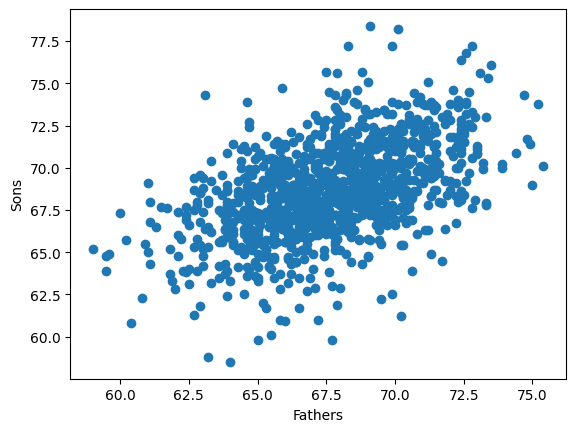

In [8]:
plt.scatter(pearson['Fathers'],pearson['Sons'])
plt.xlabel('Fathers')
plt.ylabel('Sons')

## 2.1 What can you read from the plot?
What can we infer from the scatter plot above concerning the height variable?

    A. There is no correlation between Father and son.

    B. There is a negative correlation visible.

    C. There is a positive correlation visible.

    D. Nothing can be inferred from just the graph.
    
Write the letter corresponding to your chosen answer as a text string into the variable ex2_answer below.


In [9]:
# ex2_answer = "Z"
# YOUR CODE HERE
ex2_answer = "C"

In [10]:
assert hash_answer(ex2_answer.lower()) == \
    "2e7d2c03a9507ae265ecf5b5356885a53393a2029d241394997265a1a25aefc6", \
    "Wrong choice. Remember that correlation does not depend on units."
print("Nice!")

Nice!


## 2.2 The outlier

Analysing the following dataset we can spot some really weird heights or so called outliers. This could be the tallest men ever, or giants really existed!  

Adjust the function below so that it returns the Pearson correlation and the Spearman correlation (in this order) between fathers' and the sons' heights.

Text(0, 0.5, 'Sons')

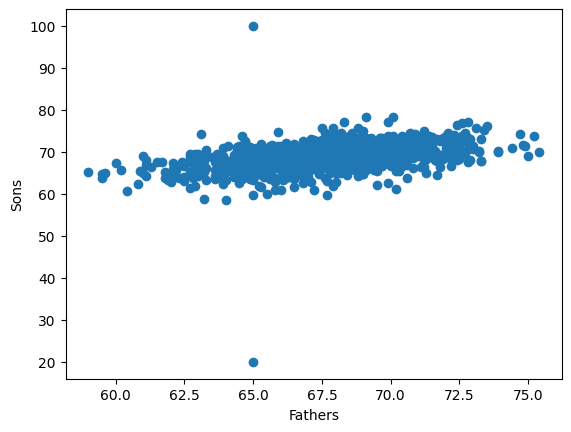

In [11]:
outlier_data = pd.read_csv('data/outlier_data.csv')
plt.scatter(outlier_data['Fathers'],outlier_data['Sons'])
plt.xlabel('Fathers')
plt.ylabel('Sons')

In [17]:
def calculate_correlations_with_pandas(fathers, sons):
    
    pearson_corr = fathers.corr(sons, method='pearson')
    spearman_corr = fathers.corr(sons, method='spearman')
    # YOUR CODE HERE
 
    return pearson_corr, spearman_corr

Pearson without outlier : 0.5011626808075912
Pearson with outlier    : 0.34273123274050016
Spearman without outlier: 0.5056466119232446
Spearman with outlier   : 0.4476711133191877


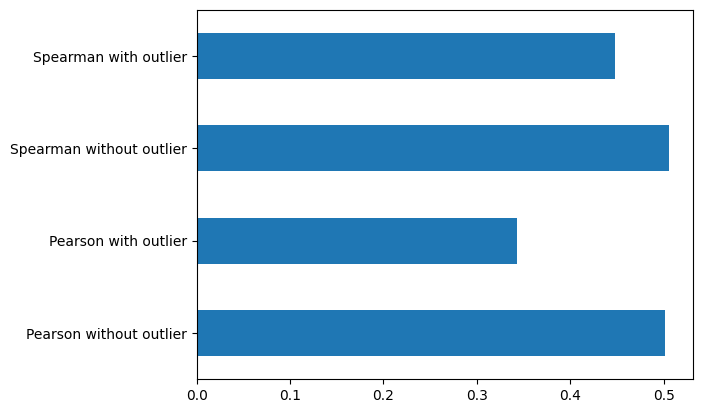

In [18]:
fathers, sons, sons_with_outliers = get_fathers_sons_outliers()

pearson_corr_normal, spearman_corr_normal = \
    calculate_correlations_with_pandas(fathers, sons)
pearson_corr_outlier, spearman_corr_outlier = \
    calculate_correlations_with_pandas(fathers, sons_with_outliers)

# quick plot to see what happens
plot_correlation_bargraph(pearson_corr_normal, pearson_corr_outlier, 
                          spearman_corr_normal, spearman_corr_outlier)

In [19]:
assert math.isclose(abs(pearson_corr_normal - pearson_corr_outlier), 0.158, \
                    abs_tol=.001), "The Pearson correlation seems to be off. "\
                    "You should see some change between the two datasets."
assert math.isclose(abs(spearman_corr_normal - spearman_corr_outlier), 0.058, \
                    abs_tol=.001), "The Spearman correlation seems to be off."\
                    " You should see almost no change between the two "\
                    "datasets."
print("So far, so good!")

So far, so good!


## 2.3 What to use when you have outliers?

So, unsurprisingly, the higher the dads are, the higher the sons: a positive correlation. But, as you can see, having outliers may hugely affect your analysis. Then, when dealing with a dataset with outliers, which correlation methodology should you use?

    A. Pearson.

    B. Spearman.

Write the letter corresponding to your chosen answer as a text string into the variable ex3_answer below.

In [22]:
# ex3_answer = "Z"
# YOUR CODE HERE
ex3_answer = "B"

In [23]:
assert hash_answer(ex3_answer.lower()) == "3e23e8160039594a33894f6564e1b1348b"\
    "bd7a0088d42c4acb73eeaed59c009d", "Wrong choice. Look at the changes in "\
    "the correlations in the bar graphs."
print("Nice! Now you can avoid the data disruption caused by the longest or "\
      "shortest man ever alive!")

Nice! Now you can avoid the data disruption caused by the longest or shortest man ever alive!


# Exercise 3: Interest in health issues 

This health search dataset includes an index of volumes of searches for various common medical topics throughout an assortment of areas in the United States. The data covers the period 2004. source: https://www.searching-for-health.com/

Explore the dataset provided below:

- Hint 1: you can use display (<name of df>) to force it to pretty print.
- Hint 2: use the heatmap of the correlation matrix that we used in the learning notebooks.
- Hint 3: you may want to import something to help with the visualization.
- Hint 4: you can either paste the answers or use a purely programmatic solution.

In [24]:
health = pd.read_csv('data/health_issue.csv')
health.head()

,cancer,cardiovascular,stroke,depression,rehab,vaccine,diarrhea,obesity,diabetes
0,44,6,17,39,21,31,14,29,38
1,47,6,13,38,16,33,12,27,32
2,48,3,16,50,12,37,24,31,37
3,44,14,14,37,19,49,14,29,31
4,52,7,16,41,23,36,14,30,37


<Axes: >

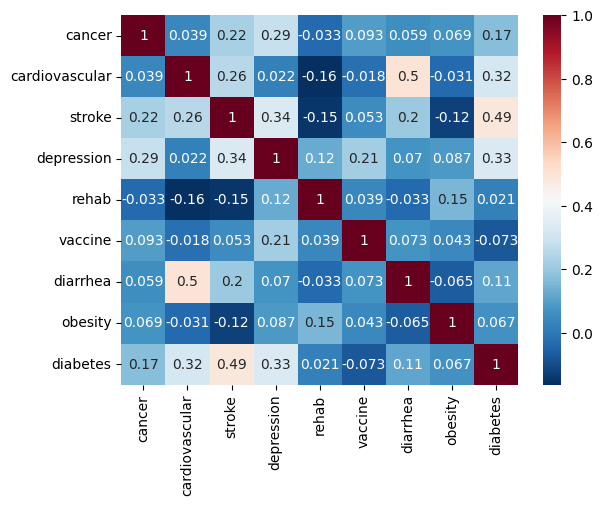

In [30]:
sns.heatmap(health.corr(), annot=True, cmap='RdBu_r')

In [51]:
# Q1: What is the pair of health issues with the most negative Pearson 
#   correlation? 
# just getting the correlation matrix again 
cor_mat = health.corr()

# Bit of crazy numpy. We are getting the triangular matrix 
# the same size as our correlation matrix, with just Trues and 
# Falses, to then use in a mask. (you can just copy paste this though) 
lower_triangle_mask = np.triu(np.ones(cor_mat.shape)).astype(bool)

# Now mask the correlation matrix, keeping only the lower triangle 
cor_mat_lower = cor_mat.mask(lower_triangle_mask)


cor_mat_lower_unstacked = cor_mat_lower.unstack().dropna()
cor_mat_lower_unstacked.nsmallest(1)

list(cor_mat_lower_unstacked.nsmallest(1).index[0])

['cardiovascular', 'rehab']

In [55]:
cor_mat_lower_unstacked.nlargest(6)

cardiovascular  diarrhea      0.500353
stroke          diabetes      0.485562
                depression    0.337162
depression      diabetes      0.334501
cardiovascular  diabetes      0.317098
cancer          depression    0.285365
dtype: float64

In [53]:
# # Q2: What is the health issue with the most negative Pearson  
#   correlation with Obesity?
cor_mat = health.corr()

identity_matrix = np.identity(cor_mat.shape[0]).astype(bool)  # diagonal only 
corr_mat_without_diagonal = cor_mat.mask(identity_matrix)

# getting the obesity row is now trivial: 
obesity_corrs = corr_mat_without_diagonal.loc['obesity']


strongest_negative_correlating_feature = obesity_corrs.idxmin()
amount_of_that_correlation = obesity_corrs.min()

strongest_negative_correlating_feature


'stroke'

In [56]:
# Complete the following questions 

# Q1: What is the pair of health issues with the most negative Pearson 
#   correlation? 
# (pass the answer as a list, and remember, you can just type it in, no 
#   fancy Pandas needed) 
# YOUR CODE HERE
health_pair_with_lowest_pearson_corr = list(cor_mat_lower_unstacked.nsmallest(1).index[0])



# # Q2: What is the health issue with the most negative Pearson  
#   correlation with Obesity?
# health_rank_pearson_corr_with_obesity = ... 
# YOUR CODE HERE
health_rank_pearson_corr_with_obesity = strongest_negative_correlating_feature

# Q3: What is the Spearman correlation between vaccine and stroke? 
#   (answer is a float, round it to two decimal places)
spearman_corr_between_vaccine_and_stroke = round(health['vaccine'].corr(health['stroke'], method='spearman'),2) 
# YOUR CODE HERE


# Q4: Observe the top 6 Pearson correlation pairs, and then look at the 
#   general correlation matrix.
# Which health issue seems to be the most correlated to other health 
#   issues making it a possible confounding variable?
# possible_confounding_variable = 
# YOUR CODE HERE
possible_confounding_variable = 'diabetes'

In [57]:

assert hash_answer(sorted(health_pair_with_lowest_pearson_corr)[0].lower()) \
    == "4bb237c1191f109fd0899e69bf015cae2920af32588512a5def831d74e263b41", \
    "That is not the pair with the lowest pearson correlation."
assert hash_answer(sorted(health_pair_with_lowest_pearson_corr)[1].lower()) \
    == "939bb889c999330525d525d62ad19cdd352928d1d79e9bddc2f88033220675c3", \
    "That is not the pair with the lowest pearson correlation."
assert hash_answer(health_rank_pearson_corr_with_obesity.lower()) == \
    "1ba7573640bbbb13a9e25d5b6946b560307af27e6c9cd040840583b186d280b5", \
    "That is not it"
assert math.isclose(spearman_corr_between_vaccine_and_stroke, 0.19, \
                    abs_tol=0.01), "Wrong spearman correlation value between "\
                    "vaccine and stroke."
assert hash_answer(possible_confounding_variable.lower()) == \
    "6a5d28d69b8b05a62caeaf6e6908402d26edf8fd2935e55ba687cbcf205ddc2f", \
    "Let's check again"

print("You got it!")


You got it!


# Exercise 4: lots of stocks
You were hired by a hedge fund, because money. 

On the first day, your boss, Greedy McRiskyface asked you to select one stock pair so that he can short one and long the other.

> NOTE: If an investor wants to short (sell) one stock and long (buy) another it means he expects the prices to move in **oposite directions!** This aspect will help you understand which correlation extreme you're expected to find.

If you select the best possible pair (use Pearson) you get a raise!

The answer should be (1) the two stocks, as a list and (2) their Pearson correlation, as a float. 

In [58]:
stock_data = utils.get_stocks_data_2()

In [59]:
stock_data 

,LJA,VDG,BBM,LNK,QEX,MTD,RLL,XBZ,UVL,WGS,...,XTE,MCF,MEB,RGT,NFL,DPY,AOV,IOD,IMM,CTA
2018-01-01,9.803844,1.725104,14.254243,7.232871,13.087118,3.184990,0.610644,5.957917,3.496983,12.626111,...,13.658227,8.736232,13.012602,7.835670,14.743409,14.348503,1.876495,7.587784,3.619850,14.569473
2018-01-02,2.347938,8.579079,9.492765,3.418111,2.120899,7.097890,4.204465,1.063179,2.957755,2.805289,...,4.229851,14.691193,14.605433,8.399848,13.240564,3.005584,12.908135,10.041376,7.484980,8.193455
2018-01-03,11.611426,14.672306,2.551748,14.501356,14.963244,14.137359,14.962111,0.893354,0.484938,13.362902,...,11.902079,5.323784,13.023309,7.846701,2.536548,10.799837,10.929938,14.830502,7.880684,0.832521
2018-01-04,10.833609,11.033981,13.094109,1.736075,5.930236,7.898302,12.051334,3.343707,6.277371,7.971141,...,12.517399,10.864442,13.207647,6.230960,11.700194,1.363189,5.378140,0.941203,5.472675,4.730645
2018-01-05,13.502135,8.240586,11.100002,13.256499,14.005095,4.328847,6.838013,14.567100,13.741203,1.229671,...,9.522394,2.364496,6.802103,5.453134,14.089296,8.520676,10.873779,1.206582,8.899308,14.092952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-06,0.821625,1.283922,12.862283,9.320966,7.336806,7.866854,2.714541,8.915681,2.171763,11.072154,...,6.291427,5.786325,5.604135,7.524384,8.162583,1.724307,2.517145,10.144545,11.924885,7.823461
2018-04-07,14.805720,1.493098,1.267255,0.011797,4.946610,2.433904,8.840099,5.802329,8.559606,5.534225,...,0.165181,6.625979,12.546966,8.685385,3.629634,13.030938,0.216386,9.798038,5.663330,0.103737
2018-04-08,4.775899,0.025933,1.490120,8.956195,12.605201,11.950515,0.122632,1.244796,8.040880,0.635488,...,5.058053,12.271881,13.561342,6.723861,4.272069,12.257413,10.344179,7.280465,10.874089,10.791340
2018-04-09,12.863795,3.759958,7.208372,5.543191,5.649558,3.925147,1.831380,11.296286,14.115163,13.072873,...,3.221422,12.831048,0.431094,6.936425,9.961875,4.901641,8.624900,11.676489,7.292273,14.889290


In [60]:
cor_mat = stock_data.corr()

# Bit of crazy numpy. We are getting the triangular matrix 
# the same size as our correlation matrix, with just Trues and 
# Falses, to then use in a mask. (you can just copy paste this though) 
lower_triangle_mask = np.triu(np.ones(cor_mat.shape)).astype(bool)

# Now mask the correlation matrix, keeping only the lower triangle 
cor_mat_lower = cor_mat.mask(lower_triangle_mask)


cor_mat_lower_unstacked = cor_mat_lower.unstack().dropna()
cor_mat_lower_unstacked.nsmallest(1)

list(cor_mat_lower_unstacked.nsmallest(1).index[0])

['OJW', 'NBL']

In [64]:
cor_mat_lower_unstacked.nsmallest(1).iloc[0]

/var/folders/zy/9r4gn9b574gdnv2l9zms0bz40000gn/T/ipykernel_22746/4137006317.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cor_mat_lower_unstacked.nsmallest(1)[0]


-0.4694947400556539

In [65]:
most_correlated_pair = list(cor_mat_lower_unstacked.nsmallest(1).index[0]) 
most_correlated_pair_value = cor_mat_lower_unstacked.nsmallest(1).iloc[0]
# YOUR CODE HERE


In [66]:
assert isinstance(most_correlated_pair, list), \
    "the most correlated pair is not a list"
assert len(most_correlated_pair) == 2, \
    "the length of the most correlated pair list is not 2"
assert math.isclose(most_correlated_pair_value, -0.47, abs_tol=0.001), \
    "The value is not correct."
utils.dirty_little_secret()


    Ok, first the good news: You got a raise on your first day at the job!!! :)
    
    And now, the "not so good"...
    we tricked you, and it was unfair of us.

    The reality is that this stock dataset was 100% RANDOM NUMBERS.

    The thing to remember is: if you use correlation without knowing the data, you are always going to find "something".
    A lot of bad data science comes from over trusting the tools without knowing the data.

    If you have enough data and dig into it using correlation you will ALWAYS find something
    ... even if there is nothing to be found.

    Correlation does not equal causality.
    And sometimes, it just means you found a signal where there was only noise.

    Now go on to the next SLU, and remember the day you modeled random numbers and found good stock picks :)
    
